In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.impute import KNNImputer
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from scipy.stats import zscore

1. Import and warehouse data: 
• Import all the given datasets and explore shape and size.
• Merge all datasets onto one and explore final shape and size.
• Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use.
• Import the data from above steps into python.

In [4]:
carAtt = pd.read_json(r'E:/Python/Part1 - Car-Attributes.json')

In [5]:
carAtt

,acc,cyl,disp,hp,mpg,origin,wt,yr
0,12.0,8,307.0,130,18.0,1,3504,70
1,11.5,8,350.0,165,15.0,1,3693,70
2,11.0,8,318.0,150,18.0,1,3436,70
3,12.0,8,304.0,150,16.0,1,3433,70
4,10.5,8,302.0,140,17.0,1,3449,70
5,10.0,8,429.0,198,15.0,1,4341,70
6,9.0,8,454.0,220,14.0,1,4354,70
7,8.5,8,440.0,215,14.0,1,4312,70
8,10.0,8,455.0,225,14.0,1,4425,70
9,8.5,8,390.0,190,15.0,1,3850,70


In [6]:
carAtt.shape

(398, 8)

In [7]:
carAtt.size

3184

In [8]:
carName = pd.read_csv('E:/Python Assingments/unsupervised project/Part1 - Car name.csv')

In [9]:
carName

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
5,ford galaxie 500
6,chevrolet impala
7,plymouth fury iii
8,pontiac catalina
9,amc ambassador dpl


In [10]:
carName.shape

(398, 1)

In [11]:
carName.size

398

* Merging both the data

In [12]:
frames = [carName, carAtt]

In [13]:
cardf = pd.concat(frames, axis=1)

In [14]:
cardf

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr
0,chevrolet chevelle malibu,12.0,8,307.0,130,18.0,1,3504,70
1,buick skylark 320,11.5,8,350.0,165,15.0,1,3693,70
2,plymouth satellite,11.0,8,318.0,150,18.0,1,3436,70
3,amc rebel sst,12.0,8,304.0,150,16.0,1,3433,70
4,ford torino,10.5,8,302.0,140,17.0,1,3449,70
5,ford galaxie 500,10.0,8,429.0,198,15.0,1,4341,70
6,chevrolet impala,9.0,8,454.0,220,14.0,1,4354,70
7,plymouth fury iii,8.5,8,440.0,215,14.0,1,4312,70
8,pontiac catalina,10.0,8,455.0,225,14.0,1,4425,70
9,amc ambassador dpl,8.5,8,390.0,190,15.0,1,3850,70


In [15]:
cardf.shape

(398, 9)

In [16]:
cardf.size

3582

In [17]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
car_name    398 non-null object
acc         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
mpg         398 non-null float64
origin      398 non-null int64
wt          398 non-null int64
yr          398 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [18]:
cardf.to_csv('E:/Python Assingments/unsupervised project/Final_cardf.csv',index=False)

In [19]:
cardf.to_excel('E:/Python Assingments/unsupervised project/Final_cardf.xlsx',index=False)

In [20]:
cardf.to_json('E:/Python Assingments/unsupervised project/Final_cardf.json')

In [21]:
csvcar = pd.read_csv('E:/Python Assingments/unsupervised project/Final_cardf.csv')

In [22]:
csvcar

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr
0,chevrolet chevelle malibu,12.0,8,307.0,130,18.0,1,3504,70
1,buick skylark 320,11.5,8,350.0,165,15.0,1,3693,70
2,plymouth satellite,11.0,8,318.0,150,18.0,1,3436,70
3,amc rebel sst,12.0,8,304.0,150,16.0,1,3433,70
4,ford torino,10.5,8,302.0,140,17.0,1,3449,70
5,ford galaxie 500,10.0,8,429.0,198,15.0,1,4341,70
6,chevrolet impala,9.0,8,454.0,220,14.0,1,4354,70
7,plymouth fury iii,8.5,8,440.0,215,14.0,1,4312,70
8,pontiac catalina,10.0,8,455.0,225,14.0,1,4425,70
9,amc ambassador dpl,8.5,8,390.0,190,15.0,1,3850,70


In [23]:
csvcar.shape

(398, 9)

In [24]:
csvcar.size

3582

In [25]:
xlsxcar = pd.read_excel('E:/Python Assingments/unsupervised project/Final_cardf.xlsx')

In [26]:
xlsxcar

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr
0,chevrolet chevelle malibu,12.0,8,307.0,130,18.0,1,3504,70
1,buick skylark 320,11.5,8,350.0,165,15.0,1,3693,70
2,plymouth satellite,11.0,8,318.0,150,18.0,1,3436,70
3,amc rebel sst,12.0,8,304.0,150,16.0,1,3433,70
4,ford torino,10.5,8,302.0,140,17.0,1,3449,70
5,ford galaxie 500,10.0,8,429.0,198,15.0,1,4341,70
6,chevrolet impala,9.0,8,454.0,220,14.0,1,4354,70
7,plymouth fury iii,8.5,8,440.0,215,14.0,1,4312,70
8,pontiac catalina,10.0,8,455.0,225,14.0,1,4425,70
9,amc ambassador dpl,8.5,8,390.0,190,15.0,1,3850,70


In [27]:
xlsxcar.shape

(398, 9)

In [28]:
xlsxcar.size

3582

In [29]:
jsoncar = pd.read_json('E:/Python Assingments/unsupervised project/Final_cardf.json')

In [30]:
jsoncar

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr
0,chevrolet chevelle malibu,12.0,8,307.0,130,18.0,1,3504,70
1,buick skylark 320,11.5,8,350.0,165,15.0,1,3693,70
10,dodge challenger se,10.0,8,383.0,170,15.0,1,3563,70
100,ford maverick,16.5,6,250.0,88,18.0,1,3021,73
101,plymouth duster,16.0,6,198.0,95,23.0,1,2904,73
102,volkswagen super beetle,21.0,4,97.0,46,26.0,2,1950,73
103,chevrolet impala,14.0,8,400.0,150,11.0,1,4997,73
104,ford country,12.5,8,400.0,167,12.0,1,4906,73
105,plymouth custom suburb,13.0,8,360.0,170,13.0,1,4654,73
106,oldsmobile vista cruiser,12.5,8,350.0,180,12.0,1,4499,73


In [31]:
jsoncar.shape

(398, 9)

In [32]:
jsoncar.size

3582

* I am going to use cardf dataframe to perform further analysis

2. Data cleansing: 
• Missing/incorrect value treatment
• Drop attribute/s if required using relevant functional knowledge
• Perform another kind of corrections/treatment on the data.

In [33]:
cardf

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr
0,chevrolet chevelle malibu,12.0,8,307.0,130,18.0,1,3504,70
1,buick skylark 320,11.5,8,350.0,165,15.0,1,3693,70
2,plymouth satellite,11.0,8,318.0,150,18.0,1,3436,70
3,amc rebel sst,12.0,8,304.0,150,16.0,1,3433,70
4,ford torino,10.5,8,302.0,140,17.0,1,3449,70
5,ford galaxie 500,10.0,8,429.0,198,15.0,1,4341,70
6,chevrolet impala,9.0,8,454.0,220,14.0,1,4354,70
7,plymouth fury iii,8.5,8,440.0,215,14.0,1,4312,70
8,pontiac catalina,10.0,8,455.0,225,14.0,1,4425,70
9,amc ambassador dpl,8.5,8,390.0,190,15.0,1,3850,70


In [34]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
car_name    398 non-null object
acc         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
mpg         398 non-null float64
origin      398 non-null int64
wt          398 non-null int64
yr          398 non-null int64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [35]:
cardf.hp = pd.to_numeric(cardf.hp, errors = 'coerce')

In [36]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
car_name    398 non-null object
acc         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          392 non-null float64
mpg         398 non-null float64
origin      398 non-null int64
wt          398 non-null int64
yr          398 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [37]:
cardf.car_name.nunique()

305

In [38]:
cardf.car_name.unique()

array(['chevrolet chevelle malibu', 'buick skylark 320',
       'plymouth satellite', 'amc rebel sst', 'ford torino',
       'ford galaxie 500', 'chevrolet impala', 'plymouth fury iii',
       'pontiac catalina', 'amc ambassador dpl', 'dodge challenger se',
       "plymouth 'cuda 340", 'chevrolet monte carlo',
       'buick estate wagon (sw)', 'toyota corona mark ii',
       'plymouth duster', 'amc hornet', 'ford maverick', 'datsun pl510',
       'volkswagen 1131 deluxe sedan', 'peugeot 504', 'audi 100 ls',
       'saab 99e', 'bmw 2002', 'amc gremlin', 'ford f250', 'chevy c20',
       'dodge d200', 'hi 1200d', 'chevrolet vega 2300', 'toyota corona',
       'ford pinto', 'plymouth satellite custom', 'ford torino 500',
       'amc matador', 'pontiac catalina brougham', 'dodge monaco (sw)',
       'ford country squire (sw)', 'pontiac safari (sw)',
       'amc hornet sportabout (sw)', 'chevrolet vega (sw)',
       'pontiac firebird', 'ford mustang', 'mercury capri 2000',
       'opel 1900'

In [39]:
cardf.isna().sum()

car_name    0
acc         0
cyl         0
disp        0
hp          6
mpg         0
origin      0
wt          0
yr          0
dtype: int64

In [40]:
cardf.hp.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [41]:
# Missing values by median
#median_filler = lambda x : x.fillna(x.median())
cardf.hp = cardf.hp.fillna(cardf.hp.median())

In [42]:
cardf.hp.unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [43]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
car_name    398 non-null object
acc         398 non-null float64
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null float64
mpg         398 non-null float64
origin      398 non-null int64
wt          398 non-null int64
yr          398 non-null int64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


3. Data analysis & visualisation: 
• Perform detailed statistical analysis on the data.
• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.
Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis. Create
your own features if required. Be highly experimental and analytical here to find hidden patterns.

In [44]:
cardf.describe()

,acc,cyl,disp,hp,mpg,origin,wt,yr
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,15.568090,5.454774,193.425879,104.304020,23.514573,1.572864,2970.424623,76.010050
std,2.757689,1.701004,104.269838,38.222625,7.815984,0.802055,846.841774,3.697627
min,8.000000,3.000000,68.000000,46.000000,9.000000,1.000000,1613.000000,70.000000
25%,13.825000,4.000000,104.250000,76.000000,17.500000,1.000000,2223.750000,73.000000
50%,15.500000,4.000000,148.500000,93.500000,23.000000,1.000000,2803.500000,76.000000
75%,17.175000,8.000000,262.000000,125.000000,29.000000,2.000000,3608.000000,79.000000
max,24.800000,8.000000,455.000000,230.000000,46.600000,3.000000,5140.000000,82.000000


In [45]:
cardf.origin.unique()

array([1, 3, 2], dtype=int64)

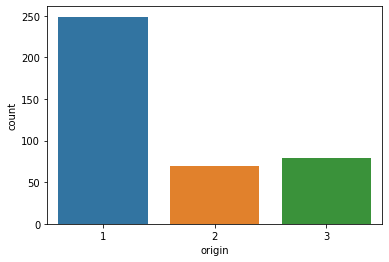

In [46]:
sns.countplot(cardf['origin'])

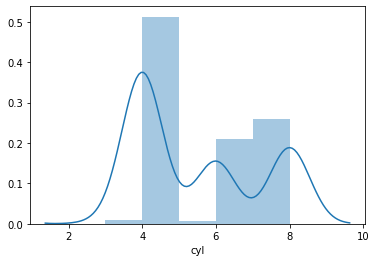

In [47]:
sns.distplot(cardf['cyl'])

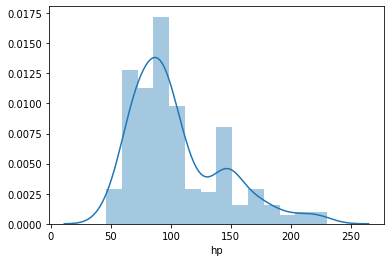

In [48]:
sns.distplot(cardf['hp'])

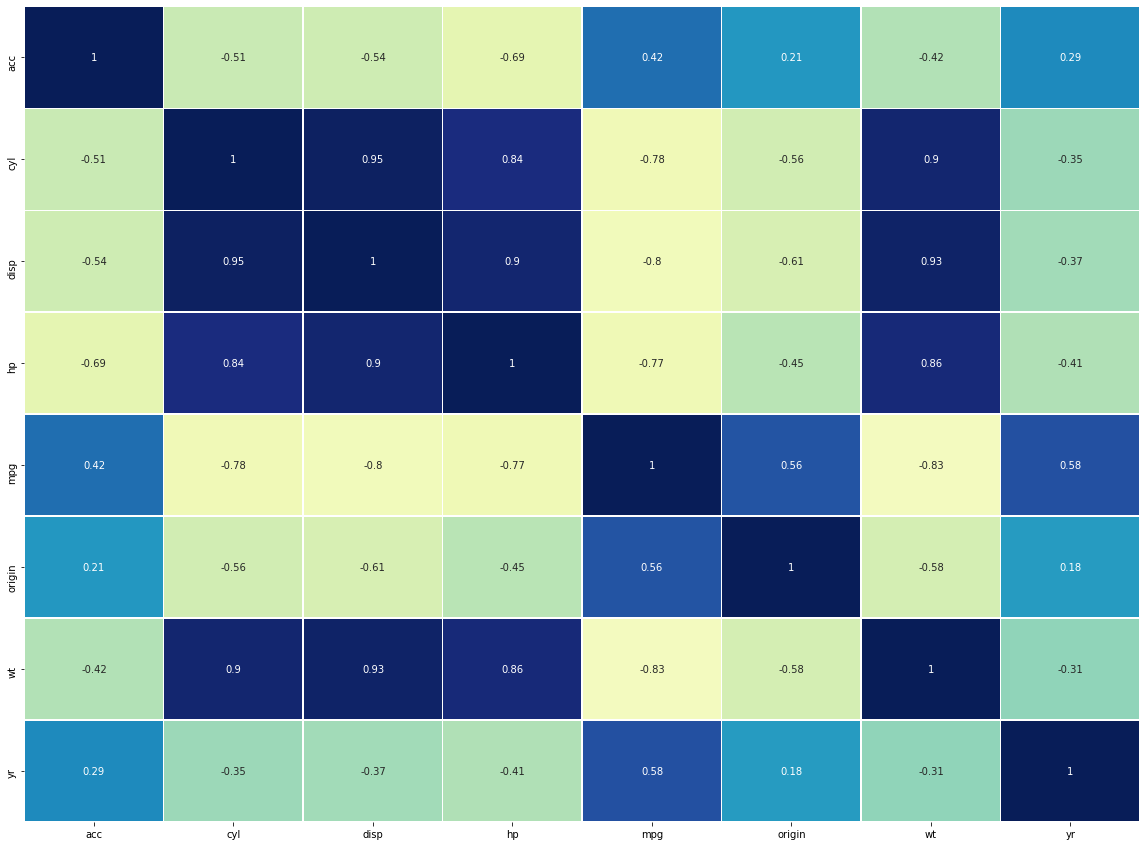

In [49]:
plt.figure(figsize=(20,15))
sns.heatmap(cardf.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

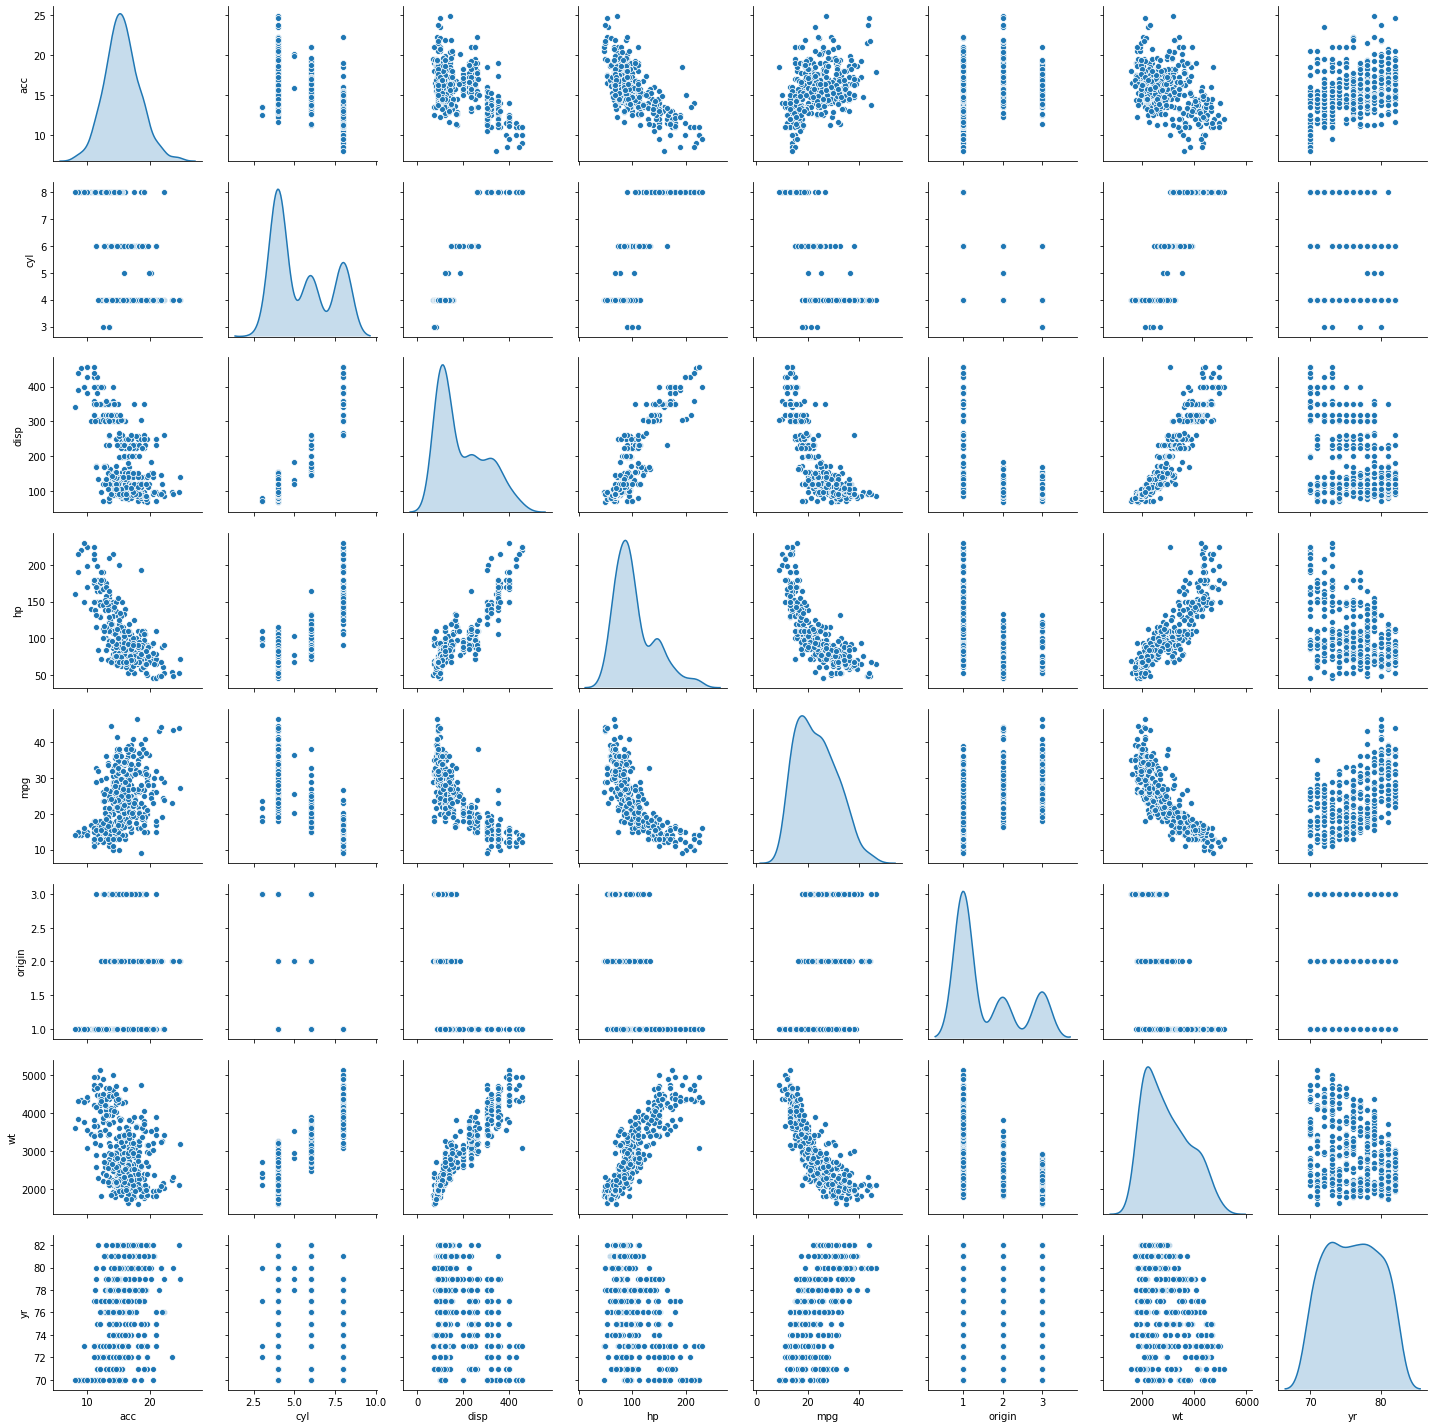

In [50]:
sns.pairplot(cardf, diag_kind = 'kde')

4. Machine learning:
• Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data.
• Share your insights about the difference in using these two methods.

In [51]:
cardf

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr
0,chevrolet chevelle malibu,12.0,8,307.0,130.0,18.0,1,3504,70
1,buick skylark 320,11.5,8,350.0,165.0,15.0,1,3693,70
2,plymouth satellite,11.0,8,318.0,150.0,18.0,1,3436,70
3,amc rebel sst,12.0,8,304.0,150.0,16.0,1,3433,70
4,ford torino,10.5,8,302.0,140.0,17.0,1,3449,70
5,ford galaxie 500,10.0,8,429.0,198.0,15.0,1,4341,70
6,chevrolet impala,9.0,8,454.0,220.0,14.0,1,4354,70
7,plymouth fury iii,8.5,8,440.0,215.0,14.0,1,4312,70
8,pontiac catalina,10.0,8,455.0,225.0,14.0,1,4425,70
9,amc ambassador dpl,8.5,8,390.0,190.0,15.0,1,3850,70


In [52]:
# scaling the dataframe
Xscaled = cardf.iloc[:,1:9].apply(zscore)

In [53]:
Xscaled

,acc,cyl,disp,hp,mpg,origin,wt,yr
0,-1.295498,1.498191,1.090604,0.673118,-0.706439,-0.715145,0.630870,-1.627426
1,-1.477038,1.498191,1.503514,1.589958,-1.090751,-0.715145,0.854333,-1.627426
2,-1.658577,1.498191,1.196232,1.197027,-0.706439,-0.715145,0.550470,-1.627426
3,-1.295498,1.498191,1.061796,1.197027,-0.962647,-0.715145,0.546923,-1.627426
4,-1.840117,1.498191,1.042591,0.935072,-0.834543,-0.715145,0.565841,-1.627426
5,-2.021656,1.498191,2.262118,2.454408,-1.090751,-0.715145,1.620492,-1.627426
6,-2.384735,1.498191,2.502182,3.030708,-1.218855,-0.715145,1.635863,-1.627426
7,-2.566274,1.498191,2.367746,2.899730,-1.218855,-0.715145,1.586204,-1.627426
8,-2.021656,1.498191,2.511784,3.161685,-1.218855,-0.715145,1.719809,-1.627426
9,-2.566274,1.498191,1.887617,2.244844,-1.090751,-0.715145,1.039961,-1.627426


In [54]:
from scipy.spatial.distance import cdist

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  f"KMeans is known to have a memory leak on Windows "


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

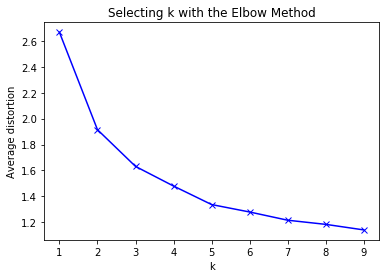

In [55]:
clusters = range(1,10)
meanDistortions = []
wss = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(Xscaled)
    predict = model.predict(Xscaled)
    meanDistortions.append(sum(np.min(cdist(Xscaled, model.cluster_centers_, 'euclidean'), axis=1)) / Xscaled
                           .shape[0])
    wss.append(model.inertia_)
    
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')



In [56]:
# Calculating WSS and Silhoute coefficient
wss

[3183.999999999999,
 1588.5924567918628,
 1190.0436525504856,
 987.9431670099705,
 829.7157874488793,
 750.7196096104874,
 680.7965150886018,
 634.0609662534855,
 602.1380092878113]

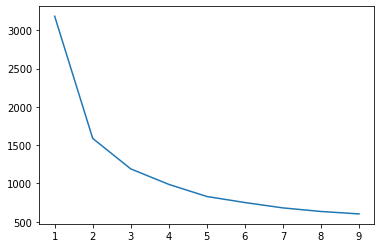

In [57]:
plt.plot(range(1,10),wss)

In [58]:
# from the above graph of WSS and elbow curve we check silhouette score for 3 and 4 cluster.
# KMeans with K=3
K_means = KMeans(n_clusters = 3)
K_means.fit(Xscaled)
labels = K_means.labels_

In [59]:
### Cluster evaluation for 3 clusters: the silhouette score
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(Xscaled,labels)

0.3246673901601844

In [60]:
# KMeans with K=4
K_means = KMeans(n_clusters = 4)
K_means.fit(Xscaled)
labels = K_means.labels_

In [61]:
### Cluster evaluation for 4 clusters: the silhouette score
silhouette_score(Xscaled,labels)

0.3123489662662654

In [62]:
cardf1 = cardf.iloc[:,0:8]

In [63]:
cardf1

,car_name,acc,cyl,disp,hp,mpg,origin,wt
0,chevrolet chevelle malibu,12.0,8,307.0,130.0,18.0,1,3504
1,buick skylark 320,11.5,8,350.0,165.0,15.0,1,3693
2,plymouth satellite,11.0,8,318.0,150.0,18.0,1,3436
3,amc rebel sst,12.0,8,304.0,150.0,16.0,1,3433
4,ford torino,10.5,8,302.0,140.0,17.0,1,3449
5,ford galaxie 500,10.0,8,429.0,198.0,15.0,1,4341
6,chevrolet impala,9.0,8,454.0,220.0,14.0,1,4354
7,plymouth fury iii,8.5,8,440.0,215.0,14.0,1,4312
8,pontiac catalina,10.0,8,455.0,225.0,14.0,1,4425
9,amc ambassador dpl,8.5,8,390.0,190.0,15.0,1,3850


In [64]:
cardf1

,car_name,acc,cyl,disp,hp,mpg,origin,wt
0,chevrolet chevelle malibu,12.0,8,307.0,130.0,18.0,1,3504
1,buick skylark 320,11.5,8,350.0,165.0,15.0,1,3693
2,plymouth satellite,11.0,8,318.0,150.0,18.0,1,3436
3,amc rebel sst,12.0,8,304.0,150.0,16.0,1,3433
4,ford torino,10.5,8,302.0,140.0,17.0,1,3449
5,ford galaxie 500,10.0,8,429.0,198.0,15.0,1,4341
6,chevrolet impala,9.0,8,454.0,220.0,14.0,1,4354
7,plymouth fury iii,8.5,8,440.0,215.0,14.0,1,4312
8,pontiac catalina,10.0,8,455.0,225.0,14.0,1,4425
9,amc ambassador dpl,8.5,8,390.0,190.0,15.0,1,3850


## silhouette_score is maximum for cluster 3 therefore considering 3 clusters having the best result.

In [65]:
# Hierarchial clustering
#Use ward as linkage metric and distance as Eucledian
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [66]:
link_method = linkage(Xscaled, method = 'average')


In [67]:
labelList = np.array(link_method)

In [68]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(Xscaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(Xscaled))

c

0.7554096381782244

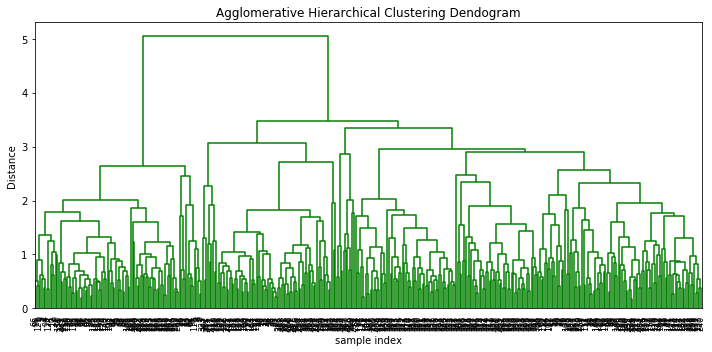

In [69]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [70]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(Xscaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(Xscaled))

c

0.723784736927783

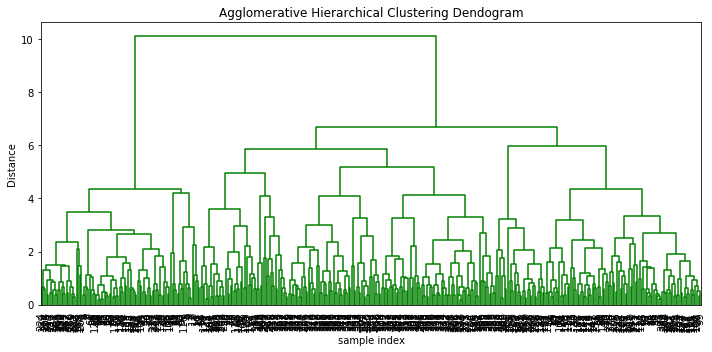

In [71]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [72]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(Xscaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(Xscaled))

c

0.681505889742128

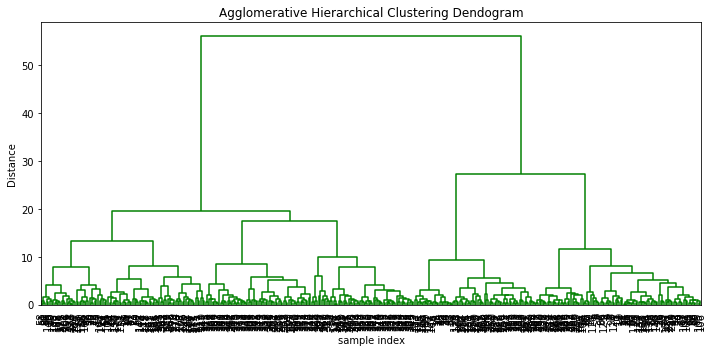

In [73]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

In [74]:
# From the above values of c we can conclude that linkage with average method is having best dedrogram as c value is highest.
# From that we can see 3 or 4 cluster are the optimal no of cluster

In [75]:
from sklearn.cluster import AgglomerativeClustering 
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
model.fit(Xscaled)
cardf['labels'] = model.labels_

In [76]:
cardf.tail(10)

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr,labels
388,chrysler lebaron medallion,14.5,4,156.0,92.0,26.0,1,2585,82,0
389,ford granada l,14.7,6,232.0,112.0,22.0,1,2835,82,0
390,toyota celica gt,13.9,4,144.0,96.0,32.0,3,2665,82,0
391,dodge charger 2.2,13.0,4,135.0,84.0,36.0,1,2370,82,0
392,chevrolet camaro,17.3,4,151.0,90.0,27.0,1,2950,82,0
393,ford mustang gl,15.6,4,140.0,86.0,27.0,1,2790,82,0
394,vw pickup,24.6,4,97.0,52.0,44.0,2,2130,82,0
395,dodge rampage,11.6,4,135.0,84.0,32.0,1,2295,82,0
396,ford ranger,18.6,4,120.0,79.0,28.0,1,2625,82,0
397,chevy s-10,19.4,4,119.0,82.0,31.0,1,2720,82,0


In [77]:
cardf.labels.unique()

array([1, 0, 2], dtype=int64)

In [78]:
cardf.groupby(['labels']).count()

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr
labels,,,,,,,,,
0,218,218,218,218,218,218,218,218,218
1,100,100,100,100,100,100,100,100,100
2,80,80,80,80,80,80,80,80,80


In [79]:
cardfclust = cardf.groupby(['labels'])

In [80]:
cardfclust.mean()

,acc,cyl,disp,hp,mpg,origin,wt,yr
labels,,,,,,,,
0,16.51422,4.059633,112.213303,79.873853,29.053211,1.977064,2338.243119,77.192661
1,12.70200,7.980000,345.470000,160.400000,14.684000,1.000000,4121.560000,73.740000
2,16.57250,6.100000,224.675000,100.756250,19.460000,1.187500,3254.200000,75.625000


# Insights from both the methods i.e Hierarchial and Non Hierarchial

In [81]:
# Non hierarchial :  KMeans
# We check for cluster variance mean, Silhouette score to choose the optimal no of cluster.
# Initially we have to give how many cluster we want.

# Hierarchial : Agglomerative Clustering
# We check for cophenetic coefficient to get the best dendogram. The better the cophenetic coefficient value the better the 
# dendogram is.
# from that we can look for optimal no of cluster.

# Optimal no of cluster from both the algorithm is same as that of 3

5. Answer below questions based on outcomes of using ML based methods.
• Mention how many optimal clusters are present in the data and what could be the possible reason behind it.
• Use linear regression model on different clusters separately and print the coefficients of the models individually
• How using different models for different clusters will be helpful in this case and how it will be different than using one single model without
clustering? Mention how it impacts performance and prediction.

In [82]:
# Optimal no cluster is 3 as from KMean we see a better balance between WSS and Silhoutte coefficient when the no of cluster is 3
# From Hierarchial method also optimal no of cluster is 3 as we see from the dendogram 

cardf0 = cardf.loc[cardf['labels'] == 0]
cardf1 = cardf.loc[cardf['labels'] == 1]
cardf2 = cardf.loc[cardf['labels'] == 2]

In [83]:
cardf0

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr,labels
14,toyota corona mark ii,15.0,4,113.0,95.0,24.0,3,2372,70,0
18,datsun pl510,14.5,4,97.0,88.0,27.0,3,2130,70,0
19,volkswagen 1131 deluxe sedan,20.5,4,97.0,46.0,26.0,2,1835,70,0
20,peugeot 504,17.5,4,110.0,87.0,25.0,2,2672,70,0
21,audi 100 ls,14.5,4,107.0,90.0,24.0,2,2430,70,0
22,saab 99e,17.5,4,104.0,95.0,25.0,2,2375,70,0
23,bmw 2002,12.5,4,121.0,113.0,26.0,2,2234,70,0
29,datsun pl510,14.5,4,97.0,88.0,27.0,3,2130,71,0
30,chevrolet vega 2300,15.5,4,140.0,90.0,28.0,1,2264,71,0
31,toyota corona,14.0,4,113.0,95.0,25.0,3,2228,71,0


In [84]:
cardf1

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr,labels
0,chevrolet chevelle malibu,12.0,8,307.0,130.0,18.0,1,3504,70,1
1,buick skylark 320,11.5,8,350.0,165.0,15.0,1,3693,70,1
2,plymouth satellite,11.0,8,318.0,150.0,18.0,1,3436,70,1
3,amc rebel sst,12.0,8,304.0,150.0,16.0,1,3433,70,1
4,ford torino,10.5,8,302.0,140.0,17.0,1,3449,70,1
5,ford galaxie 500,10.0,8,429.0,198.0,15.0,1,4341,70,1
6,chevrolet impala,9.0,8,454.0,220.0,14.0,1,4354,70,1
7,plymouth fury iii,8.5,8,440.0,215.0,14.0,1,4312,70,1
8,pontiac catalina,10.0,8,455.0,225.0,14.0,1,4425,70,1
9,amc ambassador dpl,8.5,8,390.0,190.0,15.0,1,3850,70,1


In [85]:
cardf2

,car_name,acc,cyl,disp,hp,mpg,origin,wt,yr,labels
15,plymouth duster,15.5,6,198.0,95.0,22.0,1,2833,70,2
16,amc hornet,15.5,6,199.0,97.0,18.0,1,2774,70,2
17,ford maverick,16.0,6,200.0,85.0,21.0,1,2587,70,2
24,amc gremlin,15.0,6,199.0,90.0,21.0,1,2648,70,2
33,amc gremlin,13.0,6,232.0,100.0,19.0,1,2634,71,2
34,plymouth satellite custom,15.5,6,225.0,105.0,16.0,1,3439,71,2
35,chevrolet chevelle malibu,15.5,6,250.0,100.0,17.0,1,3329,71,2
36,ford torino 500,15.5,6,250.0,88.0,19.0,1,3302,71,2
37,amc matador,15.5,6,232.0,100.0,18.0,1,3288,71,2
45,amc hornet sportabout (sw),13.5,6,258.0,110.0,18.0,1,2962,71,2


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [87]:
X0 = cardf0.drop(['car_name','mpg','labels'], axis=1)
Y0 = cardf0[['mpg']]

In [88]:
X0

,acc,cyl,disp,hp,origin,wt,yr
14,15.0,4,113.0,95.0,3,2372,70
18,14.5,4,97.0,88.0,3,2130,70
19,20.5,4,97.0,46.0,2,1835,70
20,17.5,4,110.0,87.0,2,2672,70
21,14.5,4,107.0,90.0,2,2430,70
22,17.5,4,104.0,95.0,2,2375,70
23,12.5,4,121.0,113.0,2,2234,70
29,14.5,4,97.0,88.0,3,2130,71
30,15.5,4,140.0,90.0,1,2264,71
31,14.0,4,113.0,95.0,3,2228,71


In [89]:
# Split X and y into training and test set in 70:30 ratio

X0_train, X0_test, Y0_train, Y0_test = train_test_split(X0, Y0, test_size=0.30, random_state=1)

In [90]:
LR0 = LinearRegression()
LR0.fit(X0_train,Y0_train)
for idx, col_name in enumerate(X0_train.columns):
    print("The coefficient for {} is {}".format(col_name, LR0.coef_[0][idx]))

The coefficient for acc is 0.13718533315391743
The coefficient for cyl is 1.6138363791873926
The coefficient for disp is 0.010517781703915152
The coefficient for hp is -0.06988699515743102
The coefficient for origin is 0.9312062072832896
The coefficient for wt is -0.008213875583063524
The coefficient for yr is 0.9001824287369921


In [91]:
intercept0 = LR0.intercept_[0]
print("The intercept for our model is {}".format(intercept0))

The intercept for our model is -27.214596069694824


In [92]:
print(LR0.score(X0_train, Y0_train))
LR0.score(X0_test, Y0_test)

0.6960110162275379


0.6107112203490939

# Cluster 2

In [93]:
X1 = cardf1.drop(['car_name','mpg','labels'], axis=1)
Y1 = cardf1[['mpg']]

In [94]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.30, random_state=1)

In [95]:
LR1 = LinearRegression()
LR1.fit(X1_train,Y1_train)
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, LR1.coef_[0][idx]))

The coefficient for acc is -0.4443184451861273
The coefficient for cyl is -0.04330650353226238
The coefficient for disp is -0.0029885506255025174
The coefficient for hp is -0.021000267245216933
The coefficient for origin is -4.718447854656915e-16
The coefficient for wt is -0.0015318393854526283
The coefficient for yr is 0.4417429819560394


In [96]:
intercept1 = LR1.intercept_[0]
print("The intercept for our model is {}".format(intercept1))

The intercept for our model is -1.109660433047134


In [97]:
print(LR1.score(X1_train, Y1_train))
print(LR1.score(X1_test, Y1_test))

0.601512483595422
0.6427750541550623


# Cluster 3

In [98]:
X2 = cardf2.drop(['car_name','mpg','labels'], axis=1)
Y2 = cardf2[['mpg']]

In [99]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.30, random_state=1)

In [100]:
LR2 = LinearRegression()
LR2.fit(X2_train,Y2_train)
for idx, col_name in enumerate(X1_train.columns):
    print("The coefficient for {} is {}".format(col_name, LR2.coef_[0][idx]))

The coefficient for acc is -0.183645070057004
The coefficient for cyl is 2.493167480304298
The coefficient for disp is 0.004386197274228898
The coefficient for hp is -0.01511426807386549
The coefficient for origin is 0.0943090864801469
The coefficient for wt is -0.004184585418574027
The coefficient for yr is 0.3693200975452199


In [101]:
intercept2 = LR2.intercept_[0]
print("The intercept for our model is {}".format(intercept2))

The intercept for our model is -6.9391879396906795


In [102]:
print(LR2.score(X2_train, Y2_train))
print(LR2.score(X2_test, Y2_test))

0.5047385671397951
0.3898684110273489


How using different models for different clusters will be helpful in this case and how it will be different than using one single model without 
clustering? Mention how it impacts performance and prediction.

In [1]:
# BY using different models for different clusters, we are able to target particular set of cars on which which we want to issue some offers 
# or categorise them on the basis of performance etc etc.
# Separate models for each of the cluster is helpul in seggregating different cars on the basis of mileage performance etc. From the
# same we are able to perform some improvement in the functioning or designing of cars.
# The major issue with the cluster is that the cluster datapoints should not be very less due to which we are not able to 
# build the good model due to data insuffiency. This will impact the prediction and performance of the model.

**6. Improvisation:**
* Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to perform a better data analysis in future.

**Suggestion**
* Quality: Data is good as it does not have many missing value(only 8 rows out of 398)
* Quantity: is not that good as after seggregating the data into clusters, some clusters having very less data, which is not suffice in prediction.
* Variety: Variety is ok as data is consistent. It is good for linear regression analysis.
* Veracity feature measures the accuracy of data and its potential use for analysis. Here data is accurate and good for analysis.
* Visualising: Visualising data is about representing key information and knowledge more instinctively and effectively through using different visual formats such as in a pictorial or graphical layout This data has a good visualising power.
